# Question 2
## b)

Import the relevant packages

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

Connect to the SQLite database

In [3]:
# Connect to SQLite database
conn = sqlite3.connect('airline9.db')

Read plane-data.csv and create a dataframe

In [ ]:
planes_df = pd.read_csv("plane-data.csv")

Write the dataframe to a SQLite Table

In [4]:
planes_df.to_sql('planes', conn, if_exists='append', index=False)

5029

Create a dataframe and SQLite Table for 1990 to 1999

In [5]:
for year in range(1990, 2000):
    ontime_df = pd.read_csv(f"{year}.csv")
    ontime_df.to_sql('ontime', conn, if_exists='append', index=False)

Create a new dataframe to extract tail numbers of planes with the manufacturing year of 1999 and earlier from planes_df

In [6]:
planes_age = planes_df[planes_df['year'] != "None"][["year", "tailnum"]]
planes_age['year'] = pd.to_numeric(planes_age['year'])
planes_age = planes_age[planes_age['year'] <= 1999]
planes_age.rename(columns={'year': 'manufactured_year'}, inplace=True)
planes_age.to_sql('planes_age_table', conn, if_exists='replace', index=False)

2304

Merge "ontime" with "planes_age" by the tail number of planes

In [7]:
merged_query = """
    SELECT 
        ontime.*, 
        planes_age_table.manufactured_year,
        planes_age_table.tailnum AS tailnum_planes
    FROM ontime
    INNER JOIN planes_age_table ON ontime.TailNum = planes_age_table.tailnum
"""
merged_df = pd.read_sql_query(merged_query, conn)
merged_df.to_sql('merged_table', conn, if_exists='replace', index=False)

8978750

Print out tables and graphs for each year to see whether older planes suffers more delays

    Year  manuyear  age_of_plane  avg_delay
0   1990    1990.0           0.0   9.201289
1   1990    1989.0           1.0   9.494589
2   1990    1988.0           2.0   8.011204
3   1990    1987.0           3.0   8.220333
4   1990    1986.0           4.0   8.620025
5   1990    1985.0           5.0   8.839326
6   1990    1984.0           6.0   9.778452
7   1990    1983.0           7.0   6.989209
8   1990    1982.0           8.0   6.860370
9   1990    1980.0          10.0   7.319643
10  1990    1979.0          11.0   6.926442
11  1990    1978.0          12.0   6.909651
12  1990    1977.0          13.0   6.967037
13  1990    1976.0          14.0   7.383641
14  1990    1975.0          15.0   6.700338
15  1990    1974.0          16.0   5.622375
16  1990    1973.0          17.0   5.811577
17  1990    1972.0          18.0   7.385193
18  1990    1971.0          19.0   4.122980
19  1990    1970.0          20.0   5.134402
20  1990    1969.0          21.0   5.362762
21  1990    1968.0          22.0

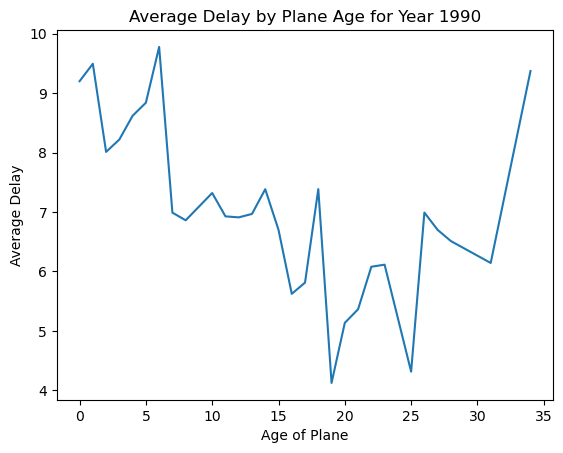

    Year  manuyear  age_of_plane  avg_delay
0   1991    1991.0           0.0   8.248675
1   1991    1990.0           1.0   9.201289
2   1991    1989.0           2.0   9.494589
3   1991    1988.0           3.0   8.011204
4   1991    1987.0           4.0   8.220333
5   1991    1986.0           5.0   8.620025
6   1991    1985.0           6.0   8.839326
7   1991    1984.0           7.0   9.778452
8   1991    1983.0           8.0   6.989209
9   1991    1982.0           9.0   6.860370
10  1991    1980.0          11.0   7.319643
11  1991    1979.0          12.0   6.926442
12  1991    1978.0          13.0   6.909651
13  1991    1977.0          14.0   6.967037
14  1991    1976.0          15.0   7.383641
15  1991    1975.0          16.0   6.700338
16  1991    1974.0          17.0   5.622375
17  1991    1973.0          18.0   5.811577
18  1991    1972.0          19.0   7.385193
19  1991    1971.0          20.0   4.122980
20  1991    1970.0          21.0   5.134402
21  1991    1969.0          22.0

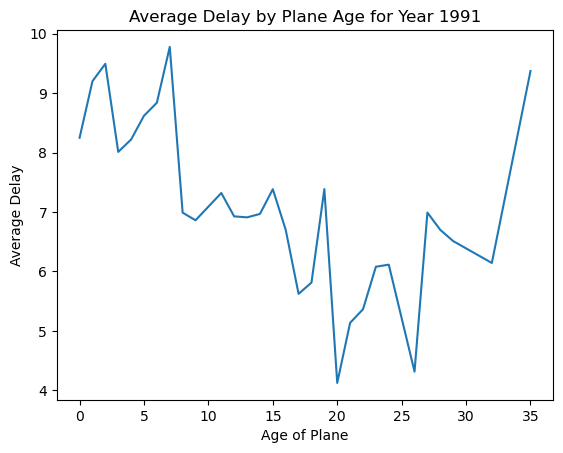

    Year  manuyear  age_of_plane  avg_delay
0   1992    1992.0           0.0   8.408048
1   1992    1991.0           1.0   8.248675
2   1992    1990.0           2.0   9.201289
3   1992    1989.0           3.0   9.494589
4   1992    1988.0           4.0   8.011204
5   1992    1987.0           5.0   8.220333
6   1992    1986.0           6.0   8.620025
7   1992    1985.0           7.0   8.839326
8   1992    1984.0           8.0   9.778452
9   1992    1983.0           9.0   6.989209
10  1992    1982.0          10.0   6.860370
11  1992    1980.0          12.0   7.319643
12  1992    1979.0          13.0   6.926442
13  1992    1978.0          14.0   6.909651
14  1992    1977.0          15.0   6.967037
15  1992    1976.0          16.0   7.383641
16  1992    1975.0          17.0   6.700338
17  1992    1974.0          18.0   5.622375
18  1992    1973.0          19.0   5.811577
19  1992    1972.0          20.0   7.385193
20  1992    1971.0          21.0   4.122980
21  1992    1970.0          22.0

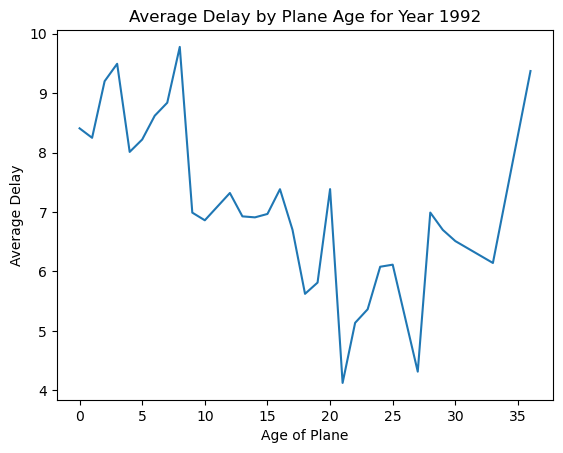

    Year  manuyear  age_of_plane  avg_delay
0   1993    1993.0           0.0   8.267669
1   1993    1992.0           1.0   8.408048
2   1993    1991.0           2.0   8.248675
3   1993    1990.0           3.0   9.201289
4   1993    1989.0           4.0   9.494589
5   1993    1988.0           5.0   8.011204
6   1993    1987.0           6.0   8.220333
7   1993    1986.0           7.0   8.620025
8   1993    1985.0           8.0   8.839326
9   1993    1984.0           9.0   9.778452
10  1993    1983.0          10.0   6.989209
11  1993    1982.0          11.0   6.860370
12  1993    1980.0          13.0   7.319643
13  1993    1979.0          14.0   6.926442
14  1993    1978.0          15.0   6.909651
15  1993    1977.0          16.0   6.967037
16  1993    1976.0          17.0   7.383641
17  1993    1975.0          18.0   6.700338
18  1993    1974.0          19.0   5.622375
19  1993    1973.0          20.0   5.811577
20  1993    1972.0          21.0   7.385193
21  1993    1971.0          22.0

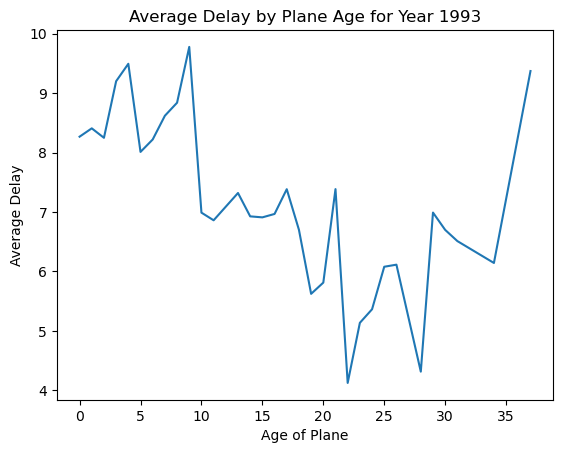

    Year  manuyear  age_of_plane  avg_delay
0   1994    1994.0           0.0   7.805481
1   1994    1993.0           1.0   8.267669
2   1994    1992.0           2.0   8.408048
3   1994    1991.0           3.0   8.248675
4   1994    1990.0           4.0   9.201289
5   1994    1989.0           5.0   9.494589
6   1994    1988.0           6.0   8.011204
7   1994    1987.0           7.0   8.220333
8   1994    1986.0           8.0   8.620025
9   1994    1985.0           9.0   8.839326
10  1994    1984.0          10.0   9.778452
11  1994    1983.0          11.0   6.989209
12  1994    1982.0          12.0   6.860370
13  1994    1980.0          14.0   7.319643
14  1994    1979.0          15.0   6.926442
15  1994    1978.0          16.0   6.909651
16  1994    1977.0          17.0   6.967037
17  1994    1976.0          18.0   7.383641
18  1994    1975.0          19.0   6.700338
19  1994    1974.0          20.0   5.622375
20  1994    1973.0          21.0   5.811577
21  1994    1972.0          22.0

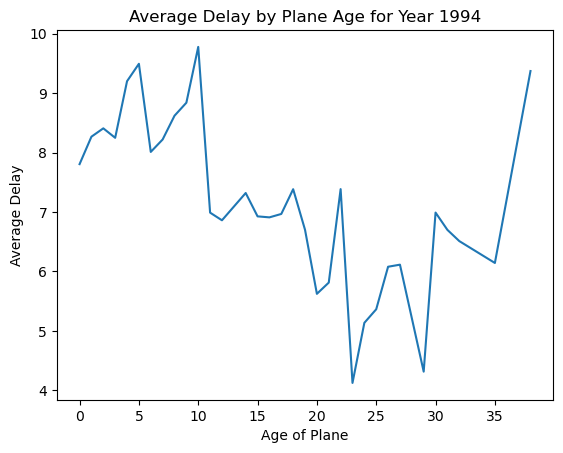

    Year  manuyear  age_of_plane  avg_delay
0   1995    1995.0           0.0   7.696728
1   1995    1994.0           1.0   7.805481
2   1995    1993.0           2.0   8.267669
3   1995    1992.0           3.0   8.408048
4   1995    1991.0           4.0   8.248675
5   1995    1990.0           5.0   9.201289
6   1995    1989.0           6.0   9.494589
7   1995    1988.0           7.0   8.011204
8   1995    1987.0           8.0   8.220333
9   1995    1986.0           9.0   8.620025
10  1995    1985.0          10.0   8.839326
11  1995    1984.0          11.0   9.778452
12  1995    1983.0          12.0   6.989209
13  1995    1982.0          13.0   6.860370
14  1995    1980.0          15.0   7.319643
15  1995    1979.0          16.0   6.926442
16  1995    1978.0          17.0   6.909651
17  1995    1977.0          18.0   6.967037
18  1995    1976.0          19.0   7.383641
19  1995    1975.0          20.0   6.700338
20  1995    1974.0          21.0   5.622375
21  1995    1973.0          22.0

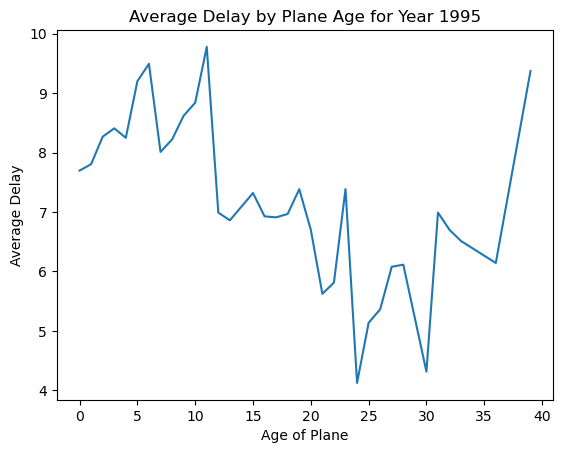

    Year  manuyear  age_of_plane  avg_delay
0   1996    1996.0           0.0   8.622147
1   1996    1995.0           1.0   7.696728
2   1996    1994.0           2.0   7.805481
3   1996    1993.0           3.0   8.267669
4   1996    1992.0           4.0   8.408048
5   1996    1991.0           5.0   8.248675
6   1996    1990.0           6.0   9.201289
7   1996    1989.0           7.0   9.494589
8   1996    1988.0           8.0   8.011204
9   1996    1987.0           9.0   8.220333
10  1996    1986.0          10.0   8.620025
11  1996    1985.0          11.0   8.839326
12  1996    1984.0          12.0   9.778452
13  1996    1983.0          13.0   6.989209
14  1996    1982.0          14.0   6.860370
15  1996    1980.0          16.0   7.319643
16  1996    1979.0          17.0   6.926442
17  1996    1978.0          18.0   6.909651
18  1996    1977.0          19.0   6.967037
19  1996    1976.0          20.0   7.383641
20  1996    1975.0          21.0   6.700338
21  1996    1974.0          22.0

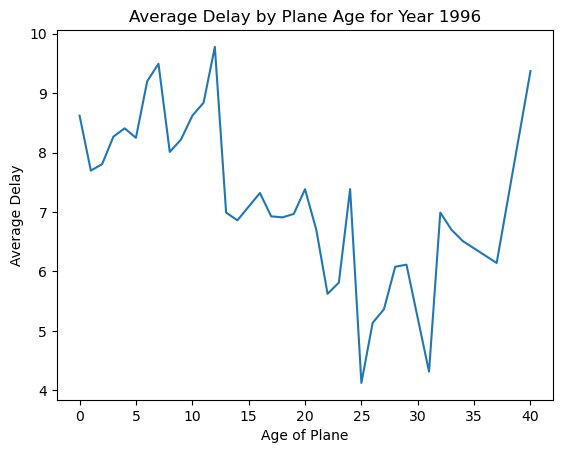

    Year  manuyear  age_of_plane  avg_delay
0   1997    1997.0           0.0   7.628117
1   1997    1996.0           1.0   8.622147
2   1997    1995.0           2.0   7.696728
3   1997    1994.0           3.0   7.805481
4   1997    1993.0           4.0   8.267669
5   1997    1992.0           5.0   8.408048
6   1997    1991.0           6.0   8.248675
7   1997    1990.0           7.0   9.201289
8   1997    1989.0           8.0   9.494589
9   1997    1988.0           9.0   8.011204
10  1997    1987.0          10.0   8.220333
11  1997    1986.0          11.0   8.620025
12  1997    1985.0          12.0   8.839326
13  1997    1984.0          13.0   9.778452
14  1997    1983.0          14.0   6.989209
15  1997    1982.0          15.0   6.860370
16  1997    1980.0          17.0   7.319643
17  1997    1979.0          18.0   6.926442
18  1997    1978.0          19.0   6.909651
19  1997    1977.0          20.0   6.967037
20  1997    1976.0          21.0   7.383641
21  1997    1975.0          22.0

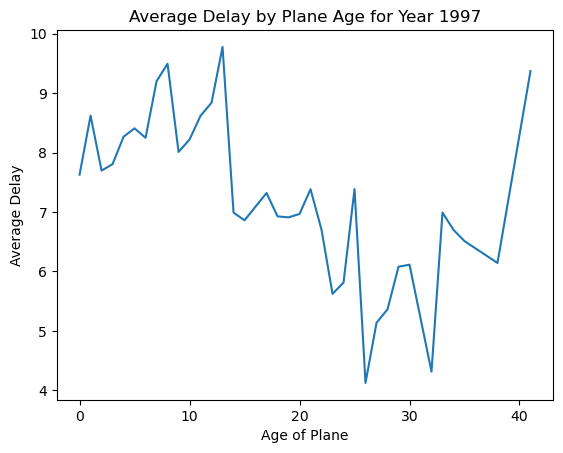

    Year  manuyear  age_of_plane  avg_delay
0   1998    1998.0           0.0   7.740293
1   1998    1997.0           1.0   7.628117
2   1998    1996.0           2.0   8.622147
3   1998    1995.0           3.0   7.696728
4   1998    1994.0           4.0   7.805481
5   1998    1993.0           5.0   8.267669
6   1998    1992.0           6.0   8.408048
7   1998    1991.0           7.0   8.248675
8   1998    1990.0           8.0   9.201289
9   1998    1989.0           9.0   9.494589
10  1998    1988.0          10.0   8.011204
11  1998    1987.0          11.0   8.220333
12  1998    1986.0          12.0   8.620025
13  1998    1985.0          13.0   8.839326
14  1998    1984.0          14.0   9.778452
15  1998    1983.0          15.0   6.989209
16  1998    1982.0          16.0   6.860370
17  1998    1980.0          18.0   7.319643
18  1998    1979.0          19.0   6.926442
19  1998    1978.0          20.0   6.909651
20  1998    1977.0          21.0   6.967037
21  1998    1976.0          22.0

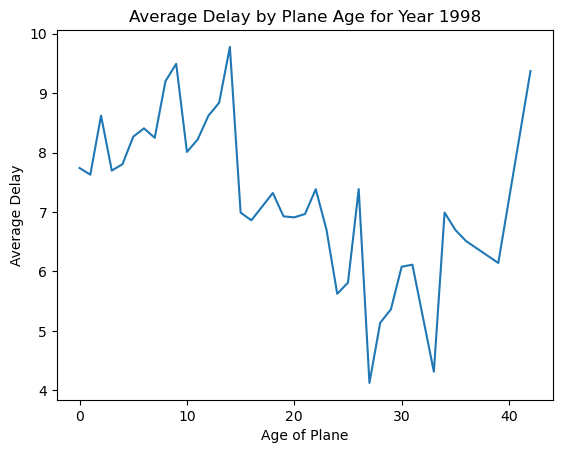

    Year  manuyear  age_of_plane  avg_delay
0   1999    1999.0           0.0   7.253227
1   1999    1998.0           1.0   7.740293
2   1999    1997.0           2.0   7.628117
3   1999    1996.0           3.0   8.622147
4   1999    1995.0           4.0   7.696728
5   1999    1994.0           5.0   7.805481
6   1999    1993.0           6.0   8.267669
7   1999    1992.0           7.0   8.408048
8   1999    1991.0           8.0   8.248675
9   1999    1990.0           9.0   9.201289
10  1999    1989.0          10.0   9.494589
11  1999    1988.0          11.0   8.011204
12  1999    1987.0          12.0   8.220333
13  1999    1986.0          13.0   8.620025
14  1999    1985.0          14.0   8.839326
15  1999    1984.0          15.0   9.778452
16  1999    1983.0          16.0   6.989209
17  1999    1982.0          17.0   6.860370
18  1999    1980.0          19.0   7.319643
19  1999    1979.0          20.0   6.926442
20  1999    1978.0          21.0   6.909651
21  1999    1977.0          22.0

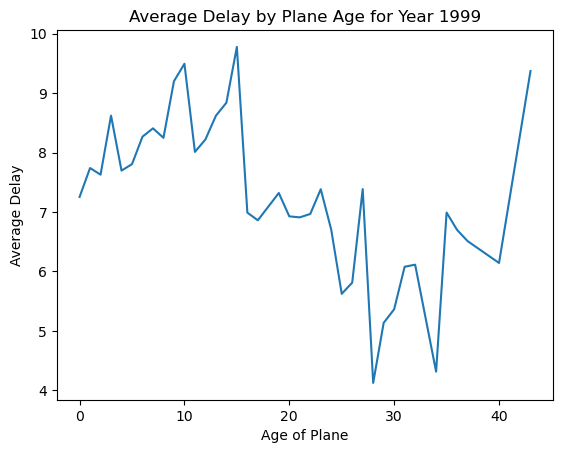

In [8]:
for year in range(1990, 2000):
    age_query = f"""
        SELECT 
            '{year}' AS Year,
            manufactured_year AS manuyear,
            '{year}' - manufactured_year AS age_of_plane,
            AVG((DepDelay + ArrDelay) / 2) AS avg_delay
        FROM merged_table
        WHERE ArrDelay IS NOT NULL AND DepDelay IS NOT NULL
        AND manufactured_year <= {year} 
        GROUP BY age_of_plane
        ORDER BY age_of_plane ASC
    """
    age_result = pd.read_sql_query(age_query, conn)
    
    print(age_result)
    
    plt.plot(age_result['age_of_plane'], age_result['avg_delay'])
    plt.title(f"Average Delay by Plane Age for Year {year}")
    plt.xlabel("Age of Plane")
    plt.ylabel("Average Delay")
    plt.show()
